In [64]:
#
#
%load_ext autoreload
%autoreload 2
%matplotlib inline
#%matplotlib notebook


#import operator
import math
import random
import numpy
import scipy
import scipy.optimize as spo
from scipy import interpolate
import itertools
import sys
#import scipy.optimize as spo
import os
import operator
#from PIL import Image as ipp
import multiprocessing as mpp
#
import matplotlib
import matplotlib.pyplot as plt
import matplotlib as mpl
import matplotlib.dates as mpd
from mpl_toolkits.mplot3d import Axes3D
import json
import pickle
#
import geopy.distance
#from geopy.distance import vincenty
#from geopy.distance import great_circle
#
#import shapely.geometry as sgp
#
from mpl_toolkits.basemap import Basemap as Basemap
from matplotlib.backends.backend_agg import FigureCanvasAgg as FigureCanvas
from geographiclib.geodesic import Geodesic as ggp
#
#import ANSStools as atp
from yodiipy import ANSStools as atp
#
import contours2kml
import globalETAS as gep
from eq_params import *
#
from nepal_figs import *
import nepal_figs
import optimizers
#
import random
import geopy
#
#colors_ =  mpl.rcParams['axes.color_cycle']
colors_ = ['b', 'g', 'r', 'c', 'm', 'y', 'k']		# make sure these are correct...
tzutc = pytz.timezone('UTC')
#

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [65]:
class orientation_test(object):
    
    def __init__(self, N_ev=20, theta=3.14/4., m=5., lat0=35., lon0=-115., dt=2.,
                     t0=dtm.datetime(2016,1,1, tzinfo=tzutc)):
        L_r = 10.**(.5*m - 1.76)
        L = 10.*L_r
        d_LL = L/111.1
        #
        R = random.Random()
        r_factor=.2
        km2_ll = 1./111.
        #
        #d_lat = km2_ll*L*math.sin(theta)/N_ev
        #d_lon = km2_ll*L*math.cos(theta)/(N_ev*math.cos(lat0))
        dt = dtm.timedelta(days=dt)
        LLs = numpy.array([[R.random()*L/(111.*math.cos(lat0)), R.random()*.2*L_r] for j in range(N_ev)])
        M_r = numpy.array([[math.cos(theta), -math.cos(theta)], [math.sin(theta), math.cos(theta)]])
        LLs = numpy.dot(LLs, M_r)
        for j,rw in enumerate(LLs):
            LLs[j][0]+=lon0
            LLs[j][1]+=lat0
        #
        # put some earthquakes on a line, then rotate them:
        #lons_lats = [[R.random()*L]]
        #plt.figure()
        #plt.plot(*zip(*LLs), marker='.', ls='')

        #
        cat = []
        #for j in range(N_ev):
        #    cat += [[t0+dt*j, lon0+j*d_lon*(1.0+R.random()*r_factor), lat0+j*d_lat*(1.0+R.random()*r_factor), m-3., mpd.date2num(t0+dt*j) ]]
        for j, (lon,lat) in enumerate(LLs):
            cat += [[t0+dt*j, lon, lat, m-3., mpd.date2num(t0+dt*j) ]]
        #
        cat += [[cat[-1][0]+dt, numpy.mean([rw[1] for rw in cat]), numpy.mean([rw[2] for rw in cat]), m,
                mpd.date2num(cat[-1][0]+dt) ]]
        #
        cat = numpy.core.records.fromarrays(zip(*cat), dtype = [('event_date', 'datetime64[us]'),
                                                                ('lon', '>f8'), ('lat', '>f8'), ('mag', '>f8'),
                                                               ('event_date_float', '>f8')])

        cat = gep.make_ETAS_catalog_mpp(cat)
        #
        #etas = gep.ETAS_mpp(catalog=cat, lons=sorted(cat['lon'])[0::len(cat)-1],  lats=sorted(cat['lat'])[0::len(cat)-1]),
        etas = gep.ETAS_mpp(catalog=cat, etas_fit_factor=2.0, )

        #
        plt.figure(figsize=(8,6))
        plt.clf()
        plt.plot(cat['lon'], cat['lat'], marker='o', ls='')
        plt.plot(cat['lon'][-1], cat['lat'][-1], marker='*', color='r', ls='', ms=16)
        #plt.plot(cat2['lon'], cat2['lat']+.25, marker='o', ls='', color='r')
        #
        #return etas
        self.__dict__.update(locals())

   

etas_prams:  {'date_range': [datetime.datetime(1990, 1, 1, 0, 0, tzinfo=<matplotlib.dates._UTC object at 0x7fb7a8424908>), datetime.datetime(2016, 12, 8, 15, 42, 40, 384360, tzinfo=<UTC>)], 'b2': 1.5, 'D_fract': 1.5, 'd_lambda': 1.76, 'lons': [-117.0, -114.0], 'p': 1.1, 'q': 1.5, 'incat': None, 'dmstar': 1.0, 'd_tau': 2.28, 'do_recarray': True, 'lats': [32.0, 38.0], 'fit_factor': 1.5, 'b1': 1.0, 'mc': 2.5}
R:  <multiprocessing.pool.ApplyResult object at 0x7fb7945a0e48>
R:  <multiprocessing.pool.ApplyResult object at 0x7fb7945a0cf8>
results fetched.
begin globalETAS.__init()__
Overriding t0 (etas catalog start date/time) for ETAS calculations. using catalog start, t0 = t_now - catlen (1825.000000) = 2011-12-10 15:42:40.062603+00:00
ETAS over etas_cat_range/xyz_range:  ([0, 51], None)
make_etas():
etas_mpp worker xyz_range:  [0, 156]
begin globalETAS.__init()__
Overriding t0 (etas catalog start date/time) for ETAS calculations. using catalog start, t0 = t_now - catlen (1825.000000) = 201

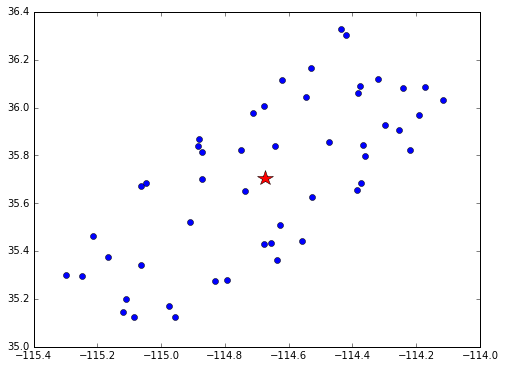

In [66]:
etas = orientation_test(N_ev=50)

In [67]:
etas.cat[-1]

(datetime.datetime(2016, 4, 10, 0, 0), -114.67334018080345, 35.70396169766098, 5.0, 736064.0, 5.495408738576246, 7.18131506425405, 0.023600869595409496, 1.6595869074375613, 0.5878580828305983, 0.3334822711856719, 1.0, 1.1, 1.5, array([  2.41374623e+08,   4.67634179e+01]), array([[ 0.93362516,  0.35825138],
       [-0.35825138,  0.93362516]]), 2.0)

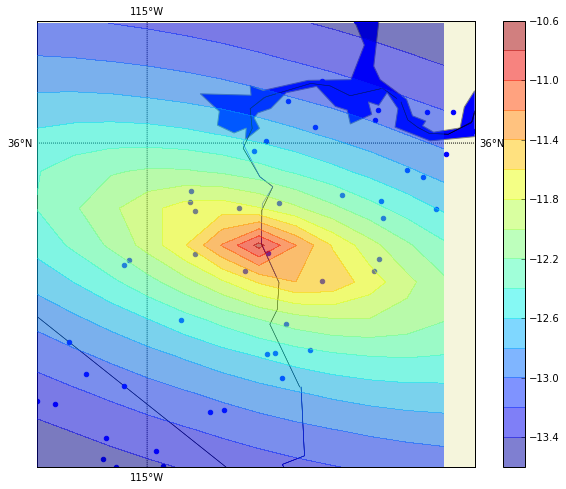

In [68]:
plt.figure(figsize=(10,8))
ax=plt.gca()
etas.etas.make_etas_contour_map(ax=ax)
for ev in etas.etas.catalog:
    #x,y = etas.etas.cm(ev['lon'], ev['lat'])
    x,y = ev['lon'], ev['lat']
    etas.etas.cm.scatter(x,y, marker='o', edgecolors='b')


In [69]:
XY = numpy.array(list(zip(etas.cat['lon'], etas.cat['lat'])))

cov:  [[ 0.10212394  0.07485446]
 [ 0.07485446  0.11035962]]
eig_vals:  [ 0.03127414  0.18120942]
eig_vecs:  [[-0.72626724 -0.68741246]
 [ 0.68741246 -0.72626724]]


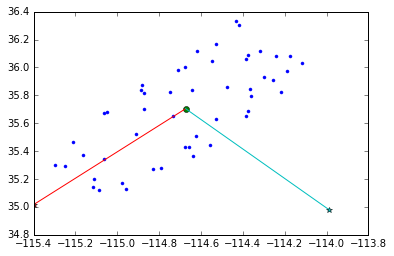

In [70]:
plt.figure()
plt.plot(*zip(*XY), marker='.', ls='')

cov = numpy.cov(XY.T)
print('cov: ', cov)
eig_vals, eig_vecs = numpy.linalg.eig(cov)
print('eig_vals: ', eig_vals)
print('eig_vecs: ', eig_vecs)
#
x0 = numpy.mean([x for x,y in XY])
y0 = numpy.mean([y for x,y in XY])
plt.plot([x0], [y0], 'o')
# for ev in eig_vecs:
#     print('ev: ', ev)
#     #plt.plot(*zip([x0,y0], ev+numpy.array([x0,y0])), marker='.', ls='-')
#     plt.plot([x0, x0+ev[0]], [y0, y0+ev[1]], marker='.', ls='-')
evs = eig_vecs
plt.plot([x0, x0+evs[0][0]], [y0, y0+evs[0][1]], ls='-', color='r')
plt.plot([x0, x0+evs[1][0]], [y0, y0+evs[1][1]], ls='-', color='c')

plt.plot([x0+evs[0][0]], [y0+evs[0][1]], '*')
plt.plot([x0+evs[1][0]], [y0+evs[1][1]], '*')


In [71]:
print(numpy.dot(evs[0], evs[1]))

0.0
